<a href="https://colab.research.google.com/github/notmylove/blogs/blob/master/tensorflow_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 使用卷积来提升计算机视觉准确率

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images, test_images = train_images/255.0, test_images/255.0
model = tf.keras.Sequential([keras.layers.Flatten(),
                            keras.layers.Dense(units=128, activation='relu'),
                            keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)
classification = model.predict(test_images)
print(classification[0], '\n', test_labels[0])

4423680/4422102 [==============================] - 0s 0us/step
Instructions for updating:
Colocations handled automatically by placer.
Epoch 1/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.4988 - acc: 0.8243
Epoch 2/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3760 - acc: 0.8659
Epoch 3/5
60000/60000 [==============================] - 8s 135us/sample - loss: 0.3375 - acc: 0.8772
Epoch 4/5
60000/60000 [==============================] - 8s 138us/sample - loss: 0.3127 - acc: 0.8853
Epoch 5/5
10000/10000 [==============================] - 1s 80us/sample - loss: 0.3475 - acc: 0.8736
[1.50778797e-05 6.08186346e-09 6.55398082e-07 3.99823570e-08
 1.77626262e-07 8.80285203e-02 5.29756517e-06 1.51415512e-01
 1.19555036e-04 7.60415137e-01] 
 9


**在计算层之前添加卷积层和MaxPooling layer**

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images=train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
train_images, test_images = train_images/255.0, test_images/255.0
model = tf.keras.Sequential([keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                              keras.layers.MaxPooling2D(2, 2),
                             keras.layers.Conv2D(64, (3, 3), activation='relu'),
                             keras.layers.MaxPooling2D(2, 2),
                             keras.layers.Flatten(),
                            keras.layers.Dense(units=128, activation='relu'),
                            keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)
classification = model.predict(test_images)
print(classification[0], '\n', test_labels[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total para

**加了卷积层和maxpooling layer层准确率确实有显著提高**，因为通常它的功能可以将一些edge特征突出显示，将一个项目分为另一个项目，然后所需的信息量就更少了......因为您只需要对突出显示的特征进行训练。

这里训练数据与测试数据较之前的不同，数据的形状需要reshape。 那是因为第一个卷积需要一个包含所有内容的单张量，所以我们需要一个60000$*$28$*$28$*$1的4D列表，而不是列表中的60,000个28$*$28$*$1项目，而且测试数据也是如此。 如果不这样做，训练时会出现错误，因为“卷积”无法识别形状。

In [0]:
train_images=train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

>Next is to define your model. Now instead of the input layer at the top, you're going to add a Convolution. The parameters are:

>1. The number of convolutions you want to generate. Purely arbitrary, but good to start with something in the order of 32
>2. The size of the Convolution, in this case a 3x3 grid
> 3. The activation function to use -- in this case we'll use relu, which you might recall is the equivalent of returning x when x>0, else returning 0
>4. In the first layer, the shape of the input data.

**配合卷积层一起使用的是maxpooling layer，目的是为了压缩图像，同时也可以保持由卷积层突出显示的特征的内容**，通过为MaxPooling指定一个（2, 2）的数组，效果相当于对图像的大小进行四分之一。创建了一个2x2的像素阵列，然后选择最大的像素，从而将4个像素变为1.它在整个图像中重复这个，并且这样做可以将水平与垂直像素数减半，有效地将图像减少25％。

## Visualizing the Convolutions and Pooling

**下面这段代码将以图形的形式为我们展示卷积**，print(test_labels[:100])打印出前100个测试集的标签，其中index 0, index 23 and index 28 的值都为9，表示属于同一类（鞋），让我们来看看在每个运行卷积的结果，可以看到它们之间出现的共同特征。

In [0]:
print(test_labels[:100])


[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


In [0]:
import matplotlib.pyplot as plt


FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.Model(inputs = model.input, outputs = layer_outputs)
print(model.layers, '\n', model.output)


[<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f160a21b128>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f160a321fd0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f160a328048>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f160a328160>, <tensorflow.python.keras.layers.core.Flatten object at 0x7f160a328240>, <tensorflow.python.keras.layers.core.Dense object at 0x7f160a3282b0>, <tensorflow.python.keras.layers.core.Dense object at 0x7f160a328400>] 
 Tensor("dense_9/Softmax:0", shape=(?, 10), dtype=float32)


**model.output**得到的是最后的输出张量，而我们是要展现卷积层后图形的变化，因此要**layer_outputs = [layer.output for layer in model.layers]**，这里得到的就是每一层的输出列表

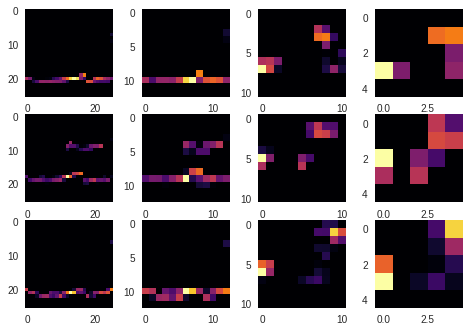

In [0]:
import matplotlib.pyplot as plt


figure, ax = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  ax[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  ax[2,x].grid(False)

## 改变产生卷积的数目

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images=train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
train_images, test_images = train_images/255.0, test_images/255.0
model = tf.keras.Sequential([keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                              keras.layers.MaxPooling2D(2, 2),
                             keras.layers.Conv2D(32, (3, 3), activation='relu'),
                             keras.layers.MaxPooling2D(2, 2),
                             keras.layers.Flatten(),
                            keras.layers.Dense(units=128, activation='relu'),
                            keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)
classification = model.predict(test_images)
print(classification[0], '\n', test_labels[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total para

## 减少卷积层和MaxPooling layer

In [0]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images=train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)
train_images, test_images = train_images/255.0, test_images/255.0
model = tf.keras.Sequential([keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
                              keras.layers.MaxPooling2D(2, 2),
                             keras.layers.Flatten(),
                            keras.layers.Dense(units=128, activation='relu'),
                            keras.layers.Dense(units=10, activation='softmax')])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(train_images, train_labels, epochs=10)
model.evaluate(test_images, test_labels)
classification = model.predict(test_images)
print(classification[0], '\n', test_labels[0])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.3838 - acc: 0.8632
Epoch 2/10
60000/60000 [========